In [1]:
# ---------------- Libraries ----------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ---------------- Load data ----------------
# Make sure "yellow_tripdata_sample.csv" is in the same directory as your notebook
try:
    df = pd.read_csv("yellow_tripdata_sample.csv", engine='pyarrow')
except ImportError:
    df = pd.read_csv("yellow_tripdata_sample.csv")

print("----------- First 5 rows of the data -----------")
print(df.head())

----------- First 5 rows of the data -----------
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amo

In [2]:
# ---------------- Data info ----------------
print("----------- Data types and info -----------")
df.info()
print("\n")

# ---------------- Descriptive stats --------
fields = [
    "passenger_count", "trip_distance", "fare_amount", "tip_amount",
    "extra", "total_amount"
]

# Using pandas describe() for most stats and adding the rest
stats_df = df[fields].describe().transpose()
stats_df['variance'] = df[fields].var()
stats_df['skew'] = df[fields].skew()
stats_df['kurtosis'] = df[fields].kurt() # pandas kurtosis is excess kurtosis
stats_df['missing_values'] = df[fields].isnull().sum()

print("----------- Descriptive Statistics -----------")
print(stats_df)

----------- Data types and info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype        
---  ------                 --------------  -----        
 0   VendorID               995 non-null    int64        
 1   tpep_pickup_datetime   995 non-null    datetime64[s]
 2   tpep_dropoff_datetime  995 non-null    datetime64[s]
 3   passenger_count        995 non-null    float64      
 4   trip_distance          995 non-null    float64      
 5   RatecodeID             995 non-null    float64      
 6   store_and_fwd_flag     995 non-null    object       
 7   PULocationID           995 non-null    int64        
 8   DOLocationID           995 non-null    int64        
 9   payment_type           995 non-null    int64        
 10  fare_amount            995 non-null    float64      
 11  extra                  995 non-null    float64      
 12  mta_tax                995 non-nul

----------- Generating Histograms & Frequency Polygons -----------


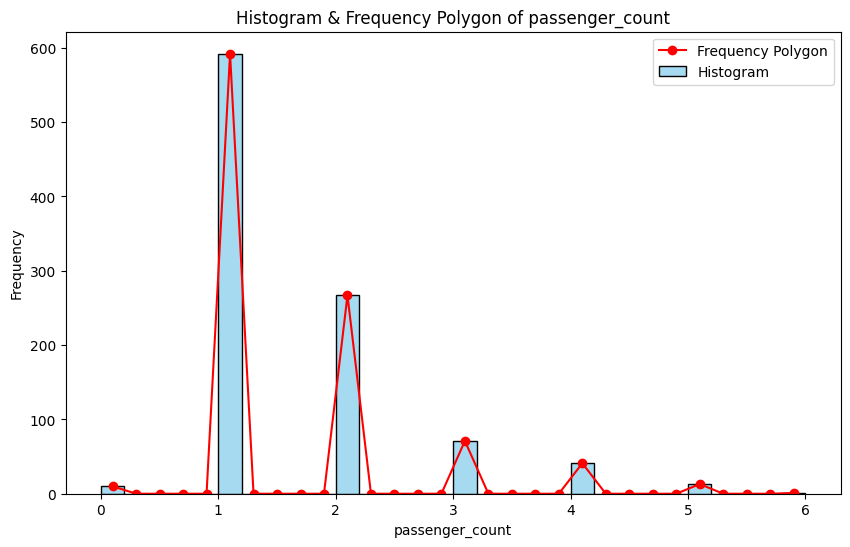

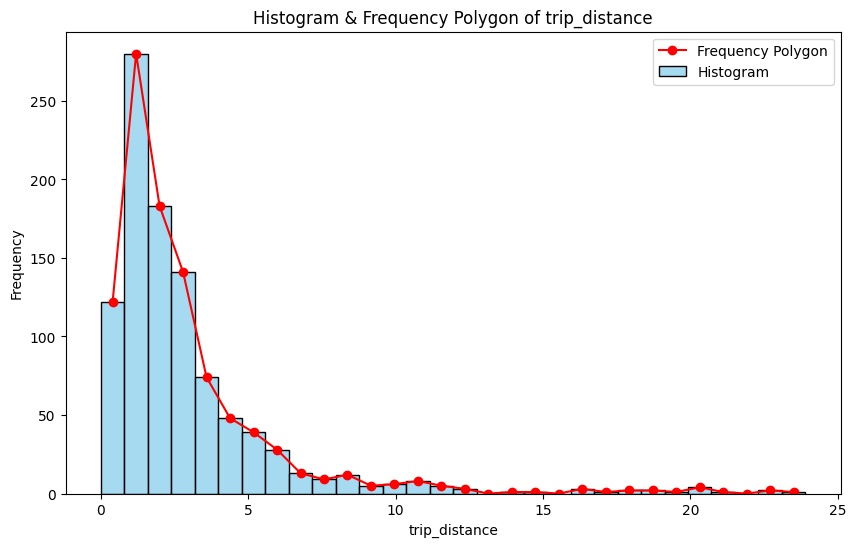

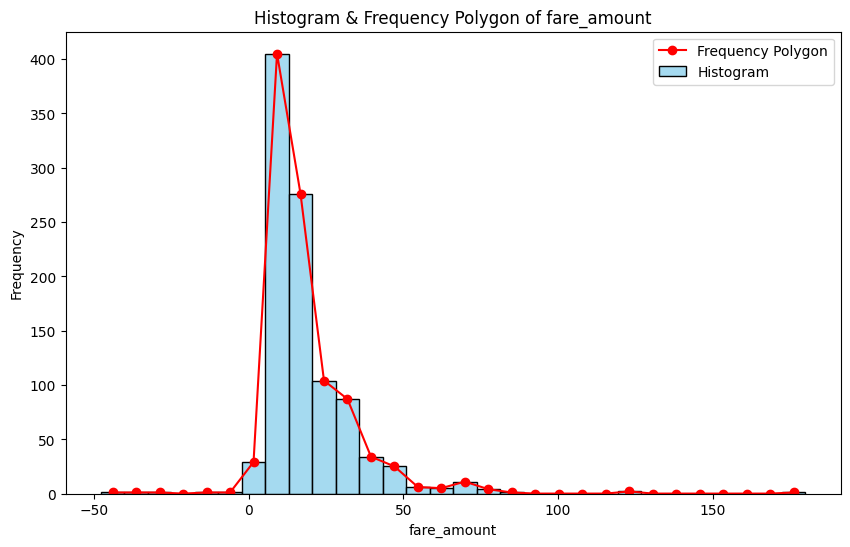

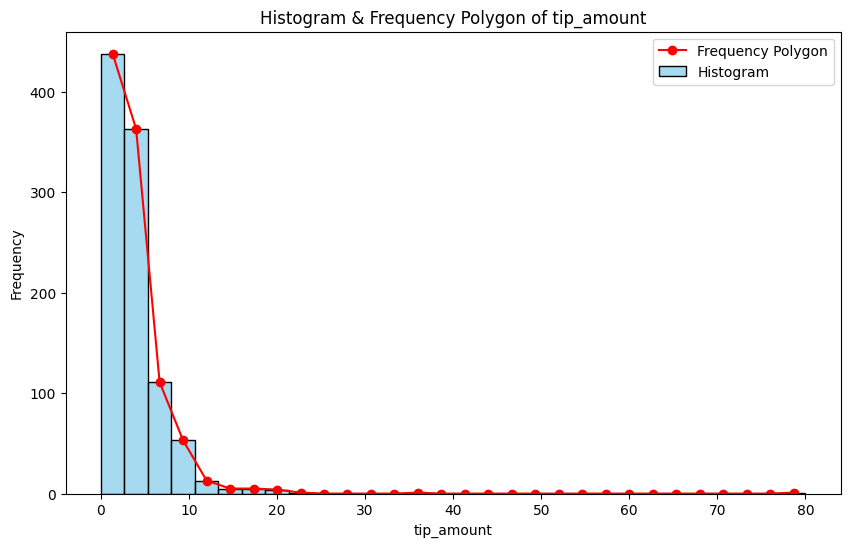

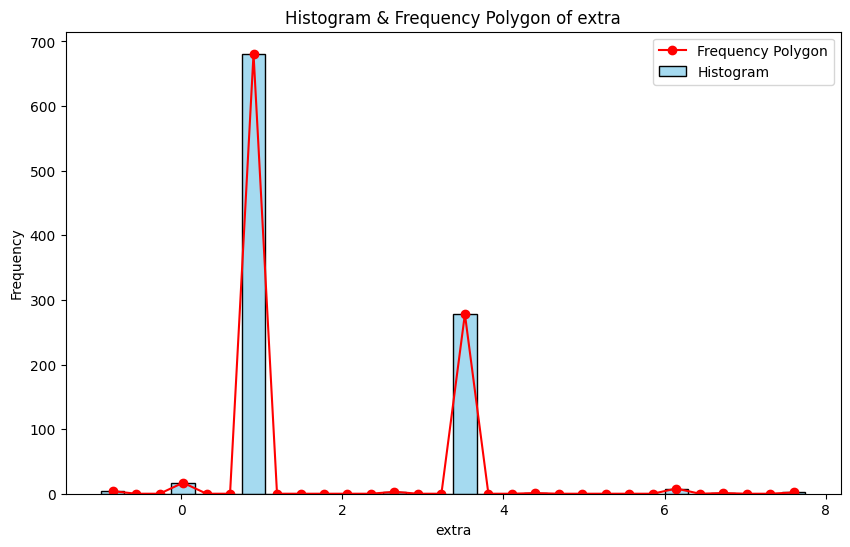

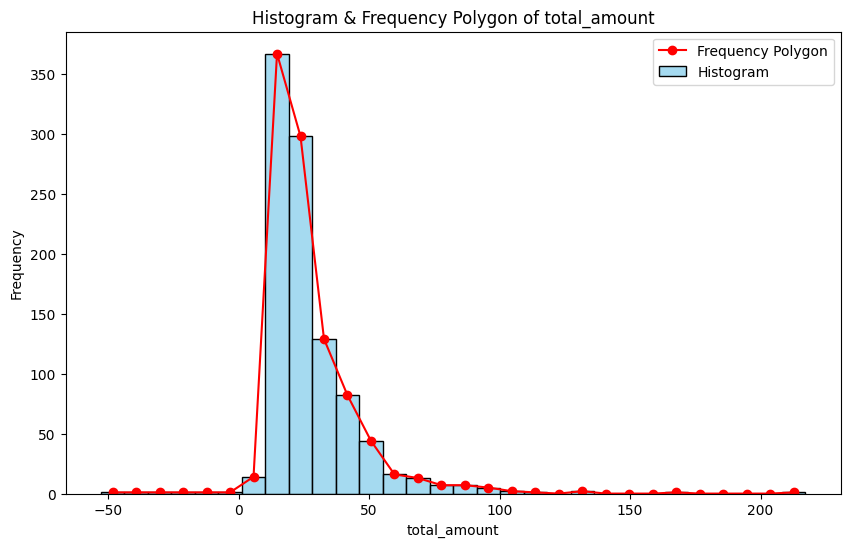

In [3]:
# ---------------- Histogram + freq polygon --
print("----------- Generating Histograms & Frequency Polygons -----------")
for col in fields:
    plt.figure(figsize=(10, 6))

    sns.histplot(df[col], bins=30, kde=False, color="skyblue", label="Histogram")

    counts, bin_edges = np.histogram(df[col].dropna(), bins=30)
    bin_mids = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.plot(bin_mids, counts, color='red', marker='o', linestyle='-', label='Frequency Polygon')

    plt.title(f"Histogram & Frequency Polygon of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


----------- Generating Boxplots & Violin Plots -----------


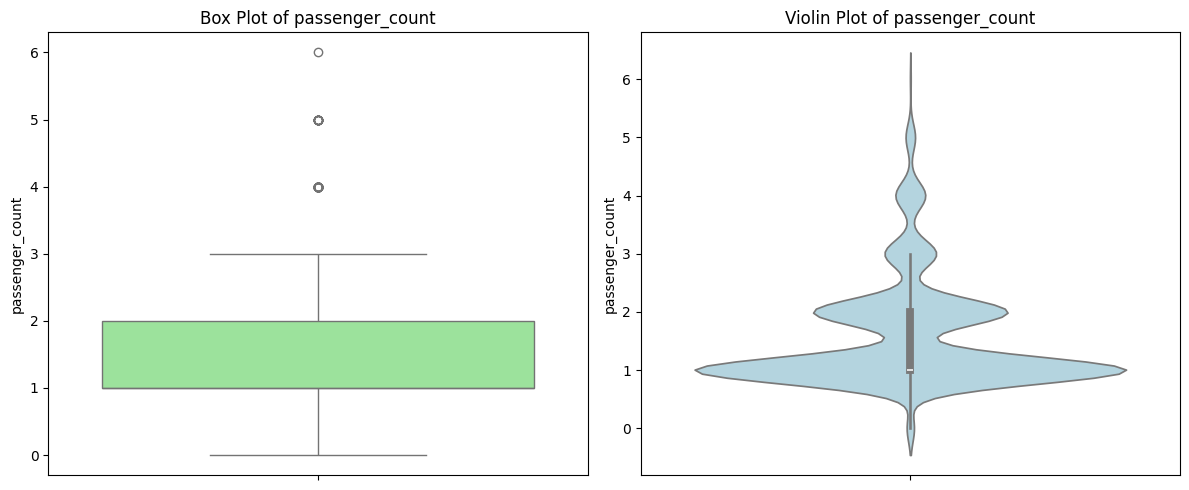

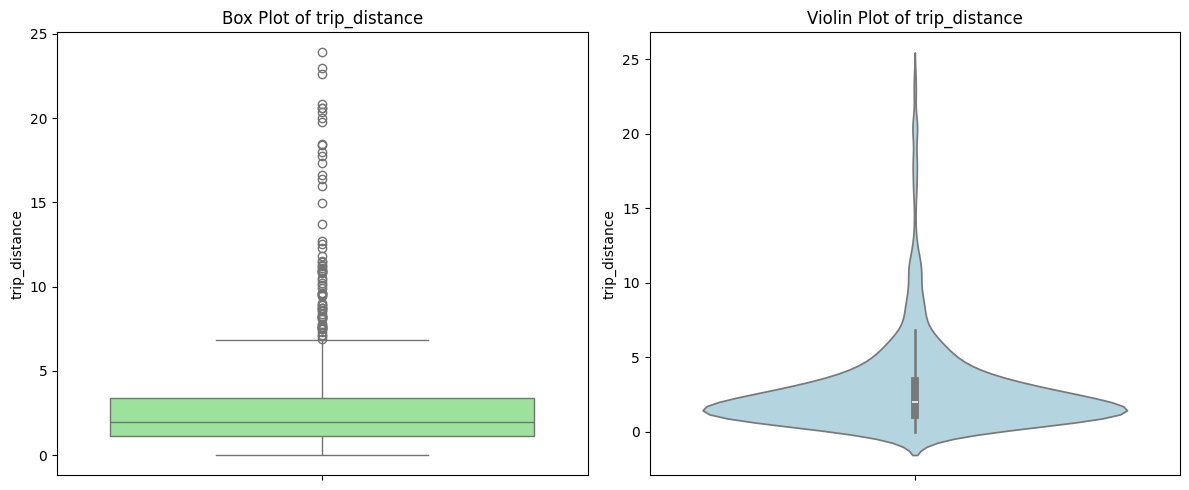

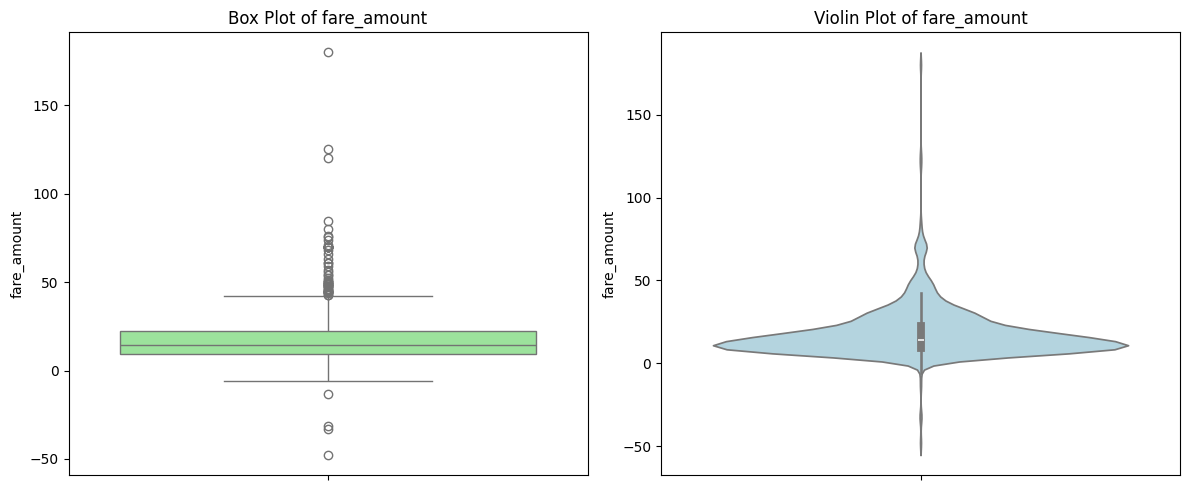

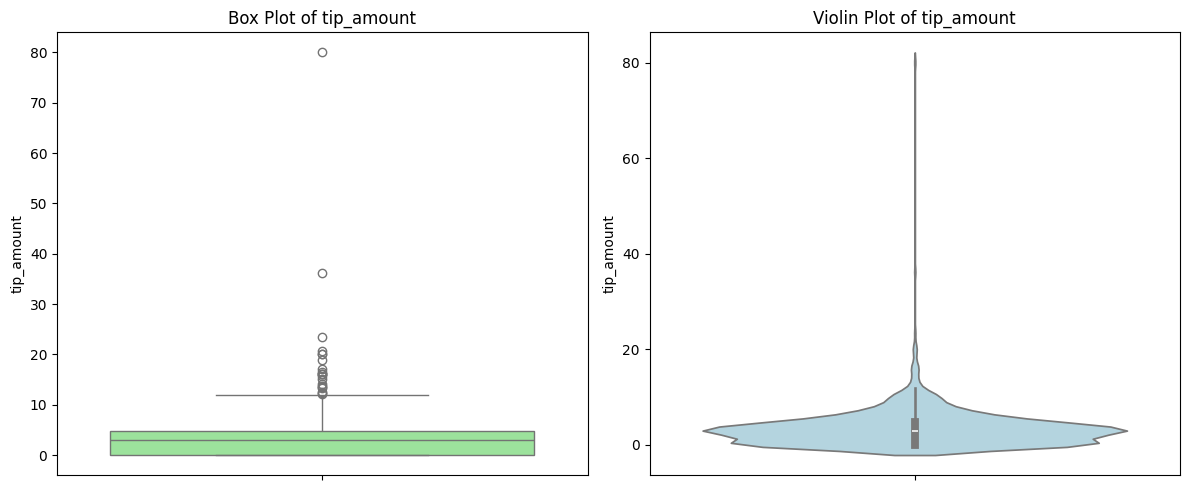

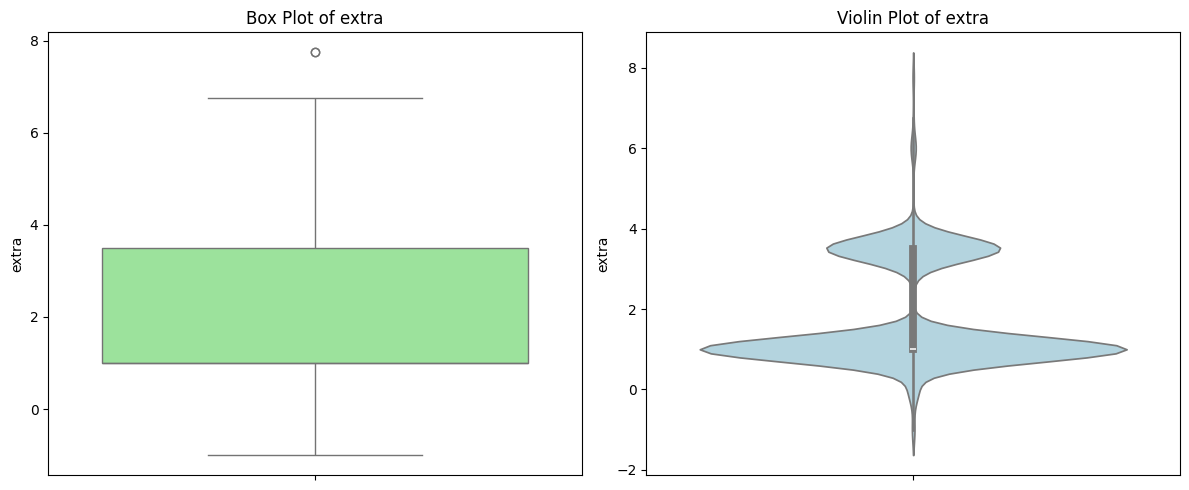

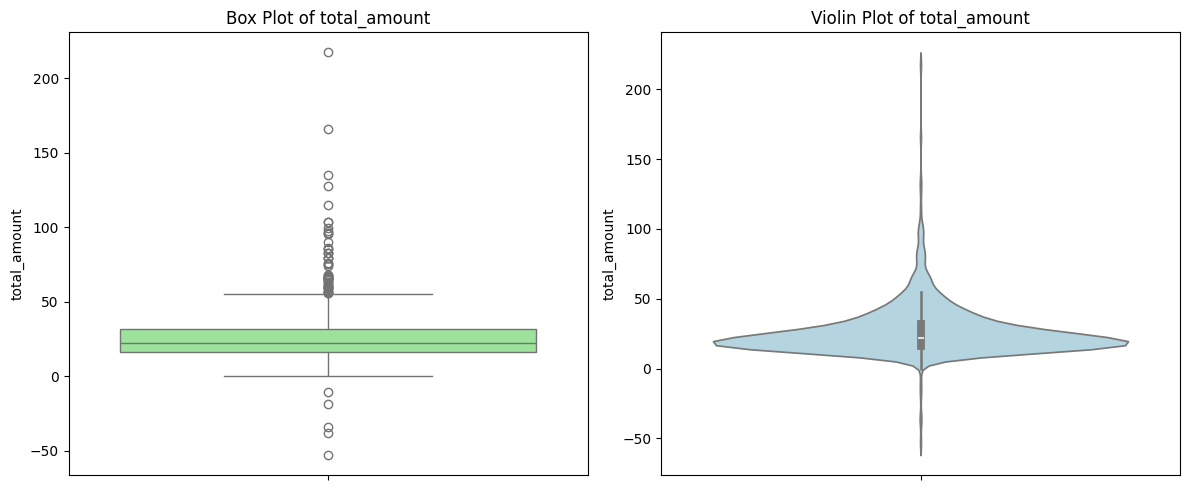

In [4]:
# ---------------- Boxplot + Violin ----------
print("\n----------- Generating Boxplots & Violin Plots -----------")
for col in fields:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=df[col], ax=axes[0], color='lightgreen')
    axes[0].set_title(f"Box Plot of {col}")
    axes[0].set_xlabel("")

    sns.violinplot(y=df[col], ax=axes[1], color='lightblue')
    axes[1].set_title(f"Violin Plot of {col}")
    axes[1].set_xlabel("")

    plt.tight_layout()
    plt.show()


----------- Generating Density Plots -----------


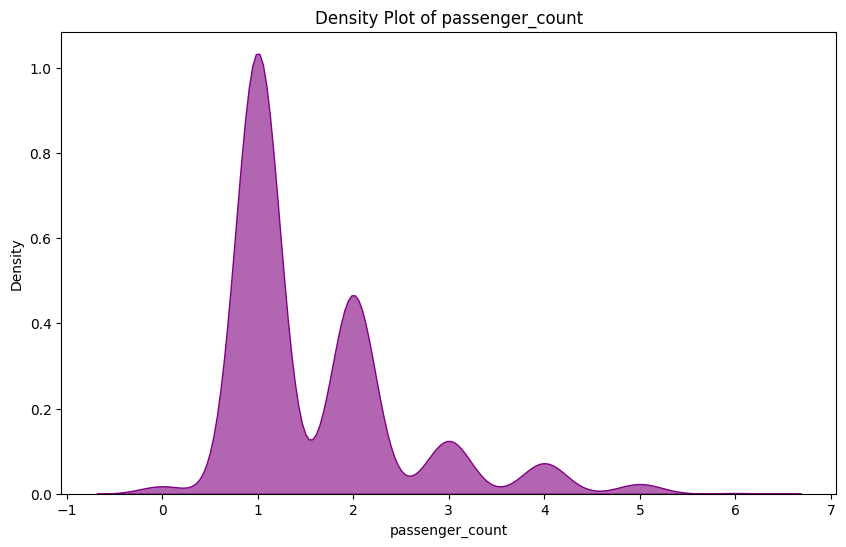

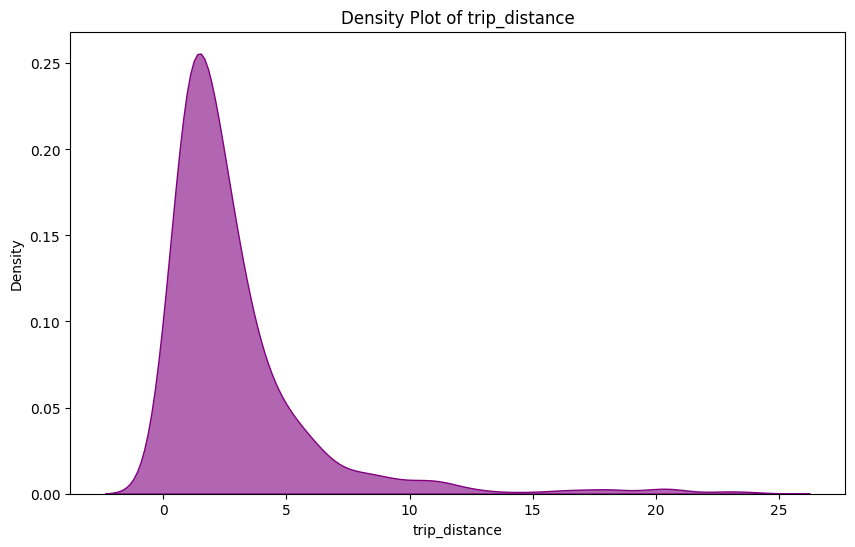

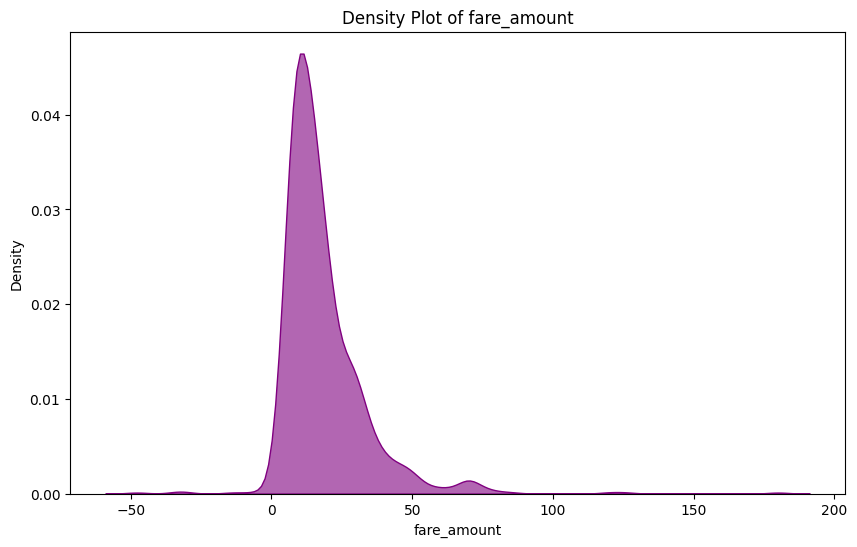

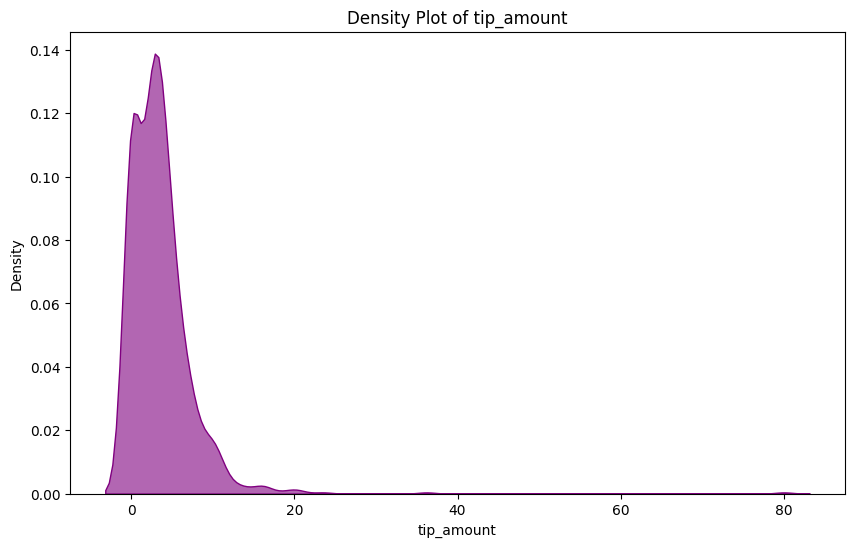

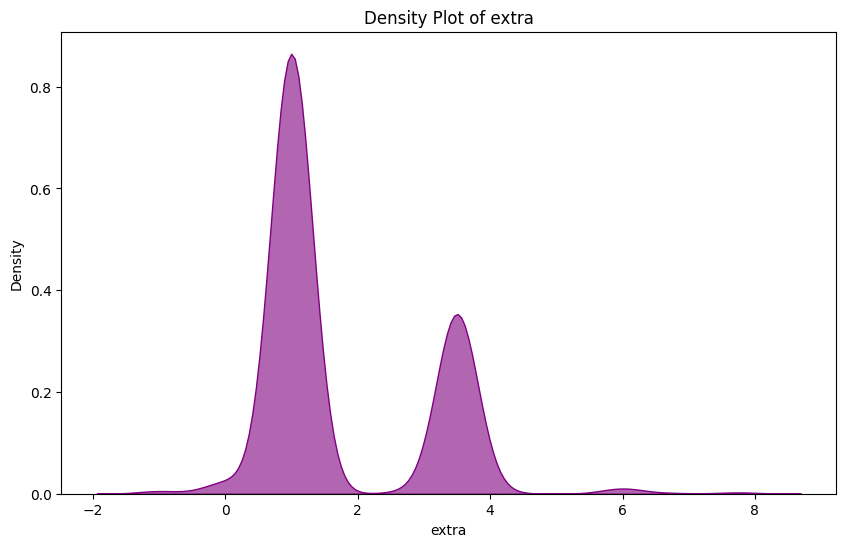

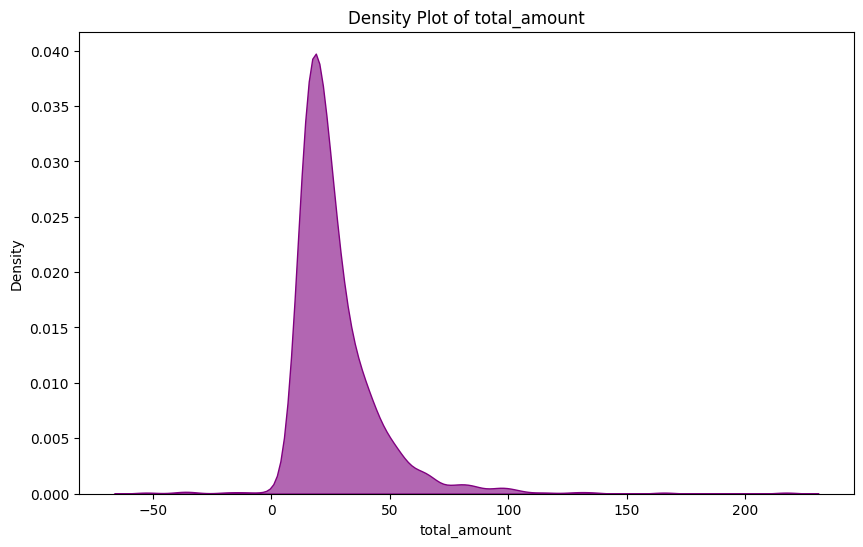

In [5]:
# ---------------- Density plots -------------
print("\n----------- Generating Density Plots -----------")
for col in fields:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], fill=True, color="purple", alpha=0.6)
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [6]:
# ---------------- Confidence intervals -----
print("\n----------- 95% Confidence Intervals -----------")
for col in ["trip_distance", "fare_amount", "tip_amount"]:
    data = df[col].dropna()
    mean = data.mean()
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))

    print(
        f"{col} -> Mean: {mean:.2f}, "
        f"95% CI: ({ci[0]:.2f}, {ci[1]:.2f})"
    )


----------- 95% Confidence Intervals -----------
trip_distance -> Mean: 2.89, 95% CI: (2.70, 3.08)
fare_amount -> Mean: 18.28, 95% CI: (17.35, 19.21)
tip_amount -> Mean: 3.48, 95% CI: (3.22, 3.74)


In [7]:
# ---------------- Hypothesis tests ----------
print("\n----------- Hypothesis Tests -----------")

# (a) One-sample t-test: tip vs $2
tip_amount = df['tip_amount'].dropna()
t_stat_one_sample, p_val_one_sample = stats.ttest_1samp(tip_amount, popmean=2)
print("\nOne-sample t-test (Tip vs $2):")
print(f"T-statistic: {t_stat_one_sample:.4f}, P-value: {p_val_one_sample:.4f}")

# (b) Two-sample t-test: fare_amount by payment_type
fare_credit = df[df['payment_type'] == 1]['fare_amount'].dropna()
fare_cash = df[df['payment_type'] == 2]['fare_amount'].dropna()
t_stat_two_sample, p_val_two_sample = stats.ttest_ind(fare_credit, fare_cash, equal_var=False)
print("\nTwo-sample t-test (Fare Credit vs Cash):")
print(f"T-statistic: {t_stat_two_sample:.4f}, P-value: {p_val_two_sample:.4f}")

# (c) Chi-square test: Payment_type vs RateCodeID
contingency_table = pd.crosstab(df['payment_type'], df['RatecodeID'])
chi2, p_val_chi, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-square Test (Payment vs RateCodeID):")
print(f"Chi2-statistic: {chi2:.4f}, P-value: {p_val_chi:.4f}")


----------- Hypothesis Tests -----------

One-sample t-test (Tip vs $2):
T-statistic: 11.1509, P-value: 0.0000

Two-sample t-test (Fare Credit vs Cash):
T-statistic: 0.2472, P-value: 0.8049

Chi-square Test (Payment vs RateCodeID):
Chi2-statistic: 6.8535, P-value: 0.5525



----------- Pearson Correlations -----------
Trip Distance vs Fare Amount: Correlation=0.8017, P-value=0.0000
Fare Amount vs Tip Amount: Correlation=0.4931, P-value=0.0000


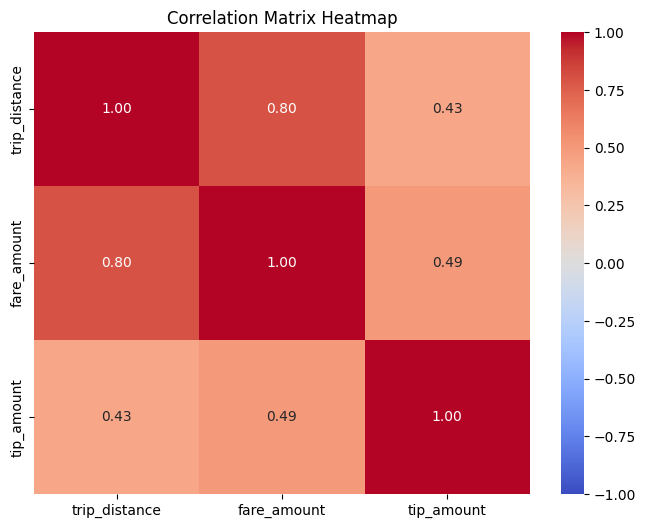

In [8]:
# ---------------- Correlations -------------
print("\n----------- Pearson Correlations -----------")
corr_td_fa, p_val_td_fa = stats.pearsonr(df['trip_distance'].dropna(), df['fare_amount'].dropna())
print(f"Trip Distance vs Fare Amount: Correlation={corr_td_fa:.4f}, P-value={p_val_td_fa:.4f}")

corr_fa_ta, p_val_fa_ta = stats.pearsonr(df['fare_amount'].dropna(), df['tip_amount'].dropna())
print(f"Fare Amount vs Tip Amount: Correlation={corr_fa_ta:.4f}, P-value={p_val_fa_ta:.4f}")

corr_cols = ["trip_distance", "fare_amount", "tip_amount"]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


----------- Generating Time Series Plots -----------


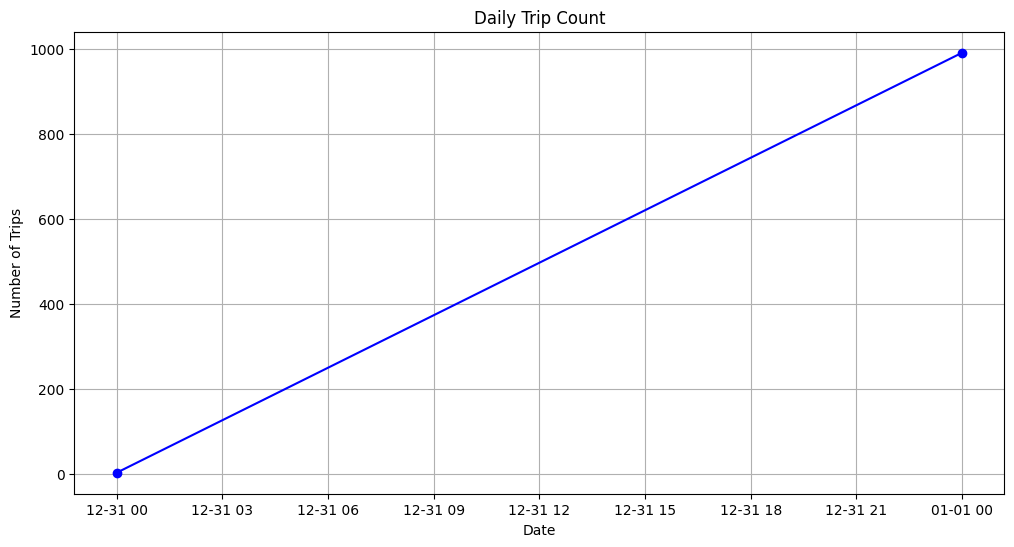

In [9]:
# ---------------- Time series ---------------
print("\n----------- Generating Time Series Plots -----------")
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
trip_counts = df.groupby('pickup_date').size().reset_index(name='count')
trip_counts['pickup_date'] = pd.to_datetime(trip_counts['pickup_date'])

plt.figure(figsize=(12, 6))
plt.plot(trip_counts['pickup_date'], trip_counts['count'], marker='o', linestyle='-', color='blue')
plt.title("Daily Trip Count")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()


----------- Generating Hourly Variation Plot -----------


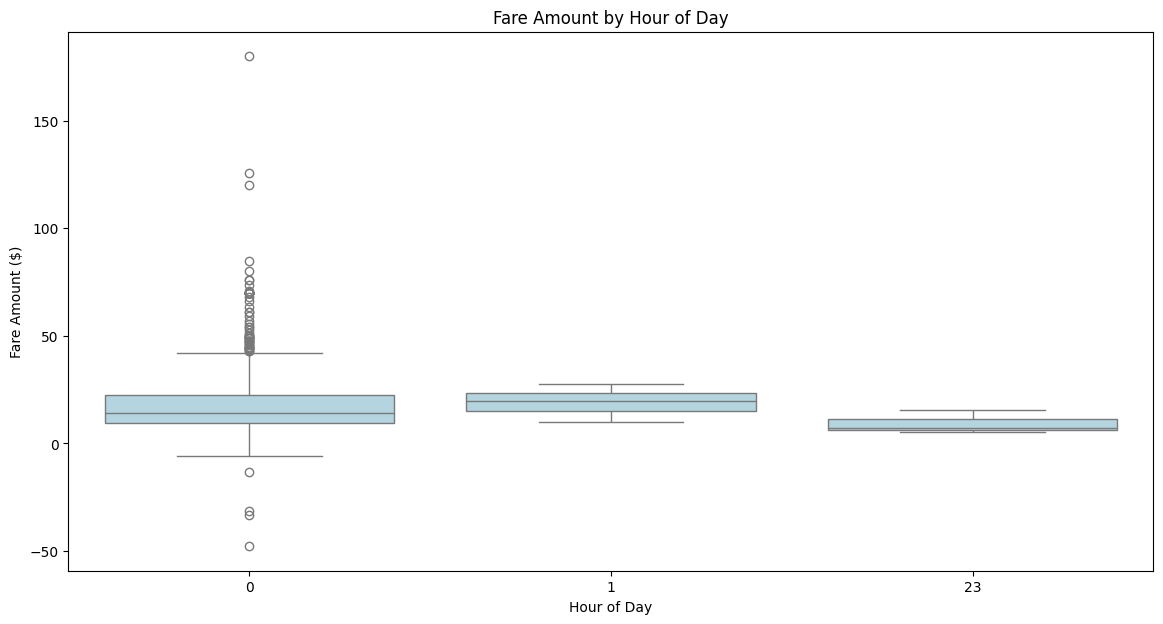

In [10]:
# ---------------- Hourly variation ----------
print("\n----------- Generating Hourly Variation Plot -----------")
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(14, 7))
sns.boxplot(x='pickup_hour', y='fare_amount', data=df, color='lightblue')
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare Amount ($)")
plt.show()